### Create image pyramide

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from opticalFlow.utils import get_image_pyramide


In [2]:
kernel = (15, 15)
scale = 0.7
sigma = 3
size = 6

In [3]:
# load image is rgb
image = cv2.imread("opticalFlow/Datasets/middlebury_optical_flow/Wooden/frame10.png")[:,:,::-1]

In [4]:
image_pyr = get_image_pyramide(image, kernel, scale, sigma, size)

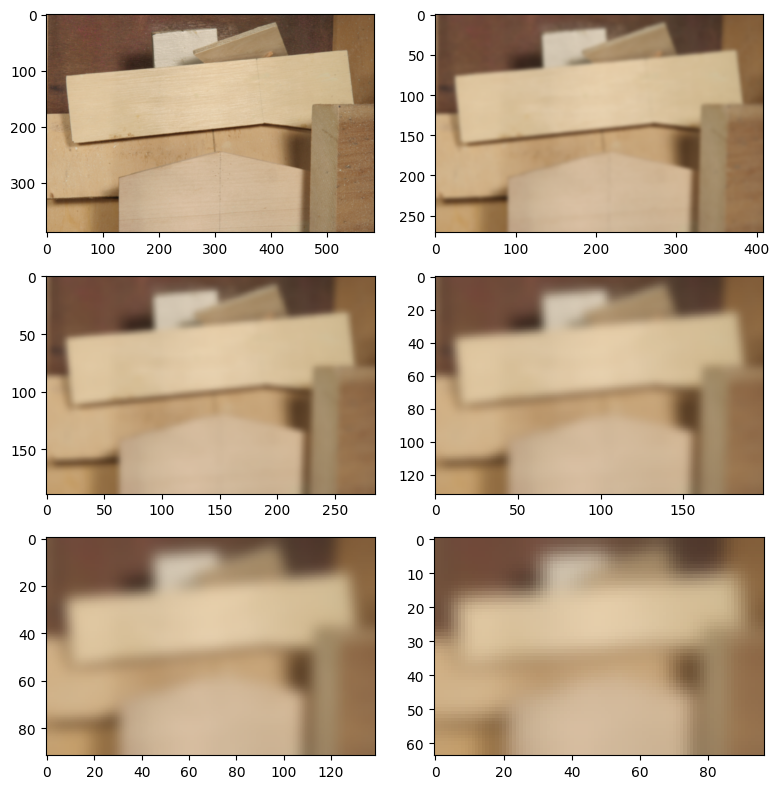

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
ax = axes.flatten()

for i in range(size):
    ax[i].imshow(image_pyr[i])

fig.tight_layout()
plt.show()

In [6]:
#Load two images

image_1 = cv2.imread("opticalFlow/Datasets/middlebury_optical_flow/Army/frame10.png", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("opticalFlow/Datasets/middlebury_optical_flow/Army/frame11.png", cv2.IMREAD_GRAYSCALE)

In [7]:
from opticalFlow.hornSchunck import horn_schunck_flow, horn_schunck_pyr_flow
from opticalFlow.draw_utils import mbcolor

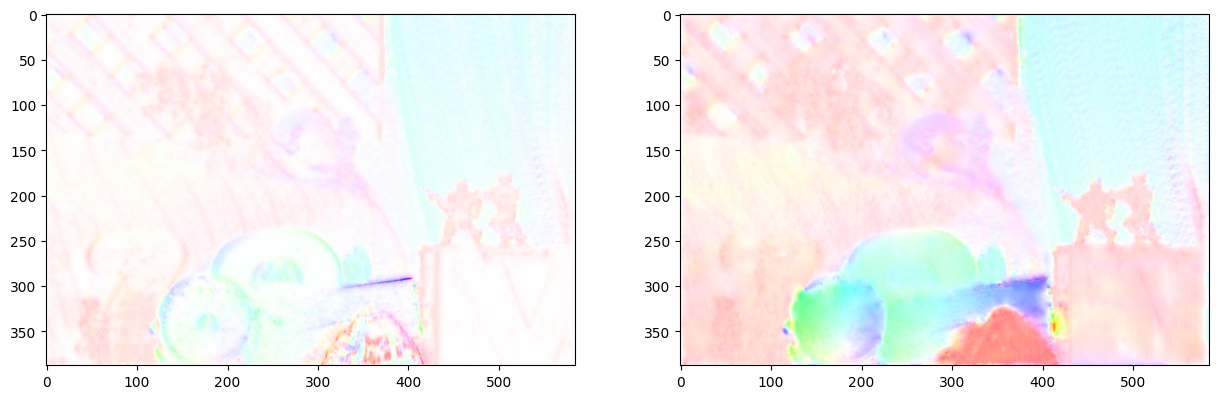

In [8]:
# Calculate the optical flow with Horn-Schunck method

flow = horn_schunck_flow(image_1, image_2, 15, 20)
flow = mbcolor(flow)

# Calculate the optical flow with pyyramidal Horn-Schunck method

flow_pyr = horn_schunck_pyr_flow(image_1, image_2, 15, 100, (5, 5), 0.65, 0.5, 10)
flow_pyr = mbcolor(flow_pyr)

# Plot flow
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.flatten()

ax[0].imshow(flow)
ax[1].imshow(flow_pyr)


In [9]:
from opticalFlow.brox import brox_optical_flow, brox_pyr_optical_flow

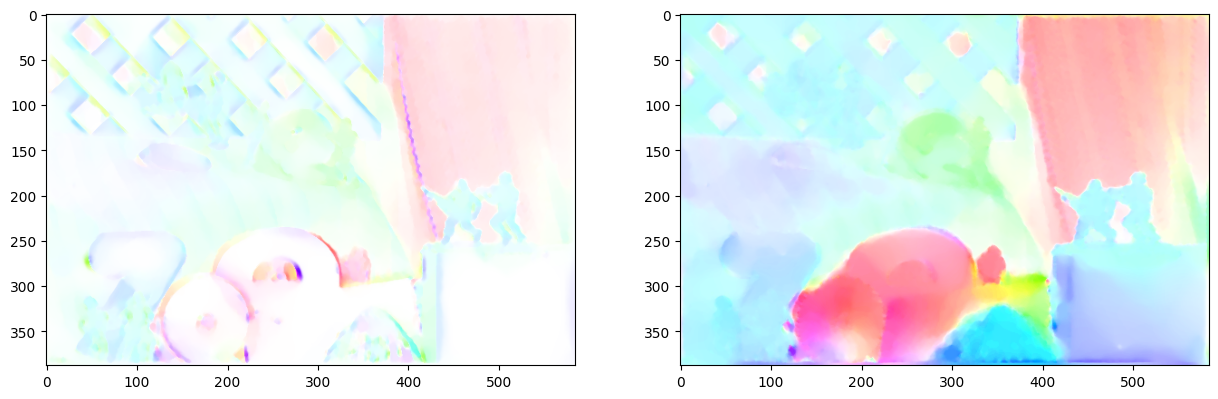

In [10]:
# Parameters
alpha = 25
gamma_d = 3
gamma_g = 3
sigma = 1.1
w_sigma = 5
nabla = 0.65
iterations_fx1 = 4
iterations_fx2 = 30
iterations_fx3 = 20
verbose = 0
flow0 = np.zeros([image_1.shape[0], image_1.shape[1], 2])

# Calculate the optical flow with brox method
flow = brox_optical_flow(
    flow0,
    image_1,
    image_2,
    alpha,
    gamma_d,
    gamma_g,
    iterations_fx2,
    iterations_fx3,
)
flow = mbcolor(flow)

# Calculate the optical flow with pyyramidal brox method
flow_pyr = brox_pyr_optical_flow(
    flow0,
    image_1,
    image_2,
    alpha,
    gamma_d,
    gamma_g,
    sigma,
    w_sigma,
    nabla,
    iterations_fx1,
    iterations_fx2,
    iterations_fx3,
    verbose,
)
flow_pyr = mbcolor(flow_pyr)

# Plot flow
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.flatten()

ax[0].imshow(flow)
ax[1].imshow(flow_pyr)

In [11]:
from segmentation.zhouyu import multiscale_segment

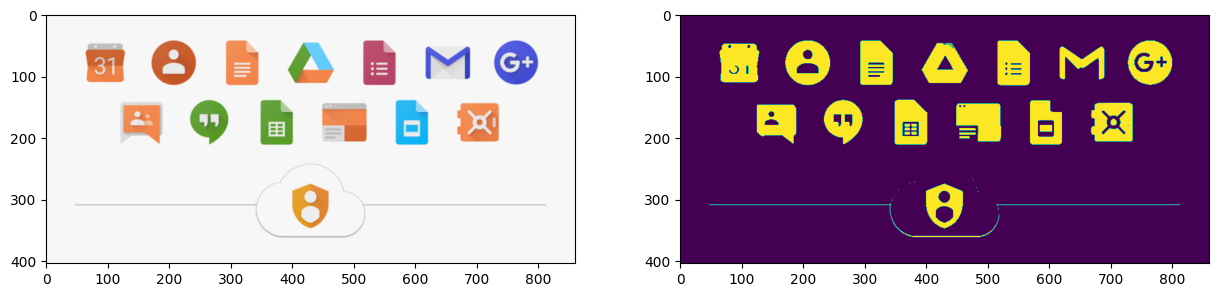

In [12]:
image = cv2.imread("google.png")
image_gray = cv2.imread("google.png", cv2.IMREAD_GRAYSCALE)
phi = multiscale_segment(image_gray, 100, 0.001, 0.5)
# Plot image and segmentation
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.flatten()

ax[0].imshow(image)
ax[1].imshow(phi)
